<a href="https://colab.research.google.com/github/pankajroy97/CIP-Data-Science-Internship/blob/main/EDA_Google_Play_Store_Apps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Matplotlib
import matplotlib.pyplot as plt
# plt is athe alias name for pyplot
import pandas as pd
# pd is the alias for pandas
import seaborn as sns
# seaborn is aliased as sns

import warnings
warnings.filterwarnings("ignore")

***1. Display Top 5 Row in Dataset***

In [ ]:
df=pd.read_csv('/content/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


***2. Check last 3 row in Dataset***

In [ ]:
df.tail(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


***3. Find shape in our Dataset (Number of Rows and Number of Columns)***

In [ ]:
df.shape

(10841, 13)

***4. Check no of duplicate row***

In [ ]:
df.duplicated().sum()

483

In [ ]:
x=df.drop_duplicates()

In [ ]:
x.shape

(10358, 13)

***5. Cleaning Null values in our Dataframe***

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
x.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
print(f"The percentage of null value present in Rating column={1465/10358*100}")

The percentage of null value present in Rating column=14.143657076655725


In [ ]:
#Full null values in categorical column using mode 
print(x['Android Ver'].mode())
print(x['Current Ver'].mode())
print(x['Type'].mode())
print(x['Content Rating'].mode())
print(x['Category'].mode())

0    4.1 and up
Name: Android Ver, dtype: object
0    Varies with device
Name: Current Ver, dtype: object
0    Free
Name: Type, dtype: object
0    Everyone
Name: Content Rating, dtype: object
0    FAMILY
Name: Category, dtype: object


In [ ]:
x['Current Ver'].fillna('Varies with device',inplace=True)
x['Android Ver'].fillna('4.1 and up',inplace=True)
x['Type'].fillna('Free',inplace=True)
x['Content Rating'].fillna('Everyone',inplace=True)

In [ ]:
#Fill null values in numerical columns using aggregate function mean or median
mean=round(df['Rating'].mean())
x['Rating'].fillna(mean,inplace=True)

In [ ]:
x.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
#check how many rows more than out of 5 rating
x[x['Rating']>5.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


In [ ]:
#Drop this row
x.drop([10472],axis=0,inplace=True)

In [ ]:
x.shape

(10357, 13)

***6. Convert all numerical columns from object to int or float format*** 

In [ ]:
x['Reviews']=x['Reviews'].astype('float')

In [ ]:
x['Reviews'].dtype

dtype('float64')

In [ ]:
x['installation']=x['Installs'].apply(lambda x:str(x).replace(',',''))
x['installation']=x['installation'].apply(lambda x:str(x).replace('+',''))
x.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,installation
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000


In [ ]:
x["installation"]=x["installation"].apply(lambda x : int(x))

In [ ]:
x["installation"].dtype

dtype('int64')

In [ ]:
x['Price']=x['Price'].apply(lambda x:str(x).replace('$',''))
x['Price']=x['Price'].apply(lambda x:float(x))

In [ ]:
x['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  float64
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10357 non-null  object 
 12  Android Ver     10357 non-null  object 
 13  installation    10357 non-null  int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 1.2+ MB


***7. Get overall statistics about the dataset***

In [ ]:
x.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,installation
count,10357,10357,10357.000000,1.035700e+04,10357,10357,10357,10357.000000,10357,10357,10357,10357,10357,1.035700e+04
unique,9659,33,NaN,NaN,461,21,2,NaN,6,119,1377,2831,33,NaN
top,ROBLOX,FAMILY,NaN,NaN,Varies with device,"1,000,000+",Free,NaN,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up,NaN
freq,9,1943,NaN,NaN,1526,1488,9592,NaN,8382,842,298,1310,2381,NaN
mean,NaN,NaN,4.161302,4.059046e+05,NaN,NaN,NaN,1.030800,NaN,NaN,NaN,NaN,NaN,1.415776e+07
std,NaN,NaN,0.488428,2.696778e+06,NaN,NaN,NaN,16.278625,NaN,NaN,NaN,NaN,NaN,8.023955e+07
min,NaN,NaN,1.000000,0.000000e+00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,4.000000,3.200000e+01,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000e+03
50%,NaN,NaN,4.200000,1.680000e+03,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000e+05
75%,NaN,NaN,4.500000,4.641600e+04,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000e+06


***8. Check Every Column Value***

In [ ]:
x.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'installation'],
      dtype='object')

In [ ]:
x['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [ ]:
x['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
x['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [ ]:
x['Reviews'].unique()

array([1.59000e+02, 9.67000e+02, 8.75100e+04, ..., 6.03000e+02,
       1.19500e+03, 3.98307e+05])

In [ ]:
x['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [ ]:
x['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
x['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [ ]:
x['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

***9. Find the average apps rating***

In [ ]:
Avg_rat=x['Rating'].mean()
Avg_rat

4.161301535193589

***10. Find the total number of unique category***

In [ ]:
x['Category'].value_counts()
print("Total no of unique category=",x['Category'].nunique())

Total no of unique category= 33


***11. Which category getting average highest rating and display top 5 category*** 

In [ ]:
high_avg=x.groupby('Category')['Rating'].mean()
h=high_avg
h.head()

Category
ART_AND_DESIGN         4.341538
AUTO_AND_VEHICLES      4.163529
BEAUTY                 4.220755
BOOKS_AND_REFERENCE    4.267391
BUSINESS               4.064871
Name: Rating, dtype: float64

***12. Find total numbers of apps getting 5 star rating***

In [ ]:
x1=x[x['Rating']==5.0].nunique()
print("Total number apps getting 5 star rating=",x1['App'])

Total number apps getting 5 star rating= 271


***13. Find the average rating of free and paid apps*** 

In [ ]:
x1=x.groupby('Type')['Rating'].mean()
print("Average rating of Free apps=",x1['Free'])
print("Average rating of paid apps=",x1['Paid'])

Average rating of Free apps= 4.157454128440367
Average rating of paid apps= 4.209542483660131


***14. Find the average value of Reviews***

In [ ]:
avg_reviews=x['Reviews'].mean()
print('Average value of Reviews=',avg_reviews)

Average value of Reviews= 405904.6106015255


***15. Find The total number of free and paid apps***

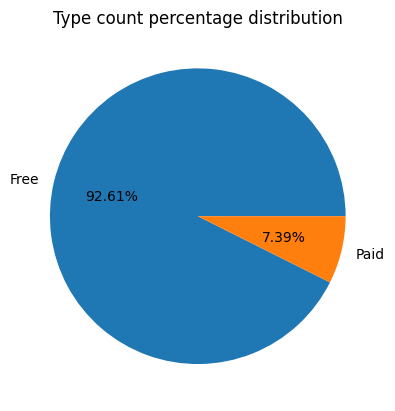

In [ ]:
x1=x['Type'].value_counts()
plt.pie(x=x1.values,labels=x1.index,autopct='%.2f%%')
plt.title("Type count percentage distribution")
plt.show()

***16. Which apps get maximum reviews and display top 5 apps having maximum reviews***

App
Facebook                                    78158306.0
WhatsApp Messenger                          69119316.0
Instagram                                   66577446.0
Messenger – Text and Video Chat for Free    56646578.0
Clash of Clans                              44893888.0
Name: Reviews, dtype: float64


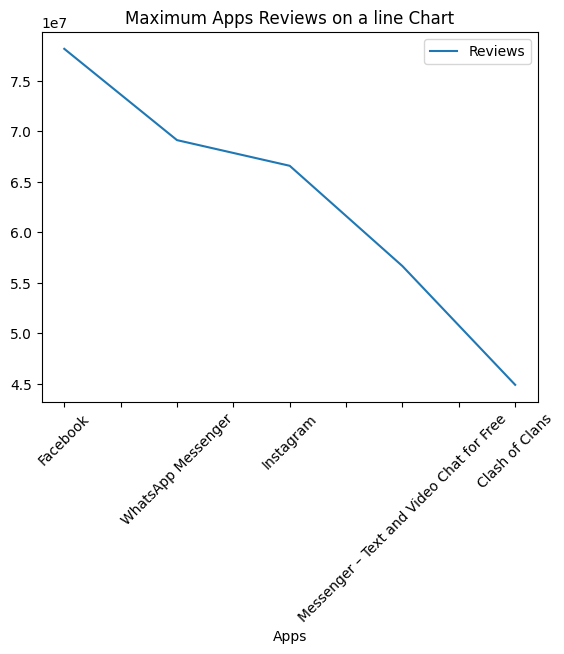

In [ ]:
x1=x.groupby('App')['Reviews'].max()
x2=x1.sort_values(ascending=False).head()
print(x2)
x2.plot(kind='line')
plt.xlabel('Apps')
plt.xticks(rotation=45)
plt.title('Maximum Apps Reviews on a line Chart')
plt.legend()
plt.show()

***17. Display top 5 apps maximum installation***

In [ ]:
x1=x.groupby('App')['installation'].max()
x2=x1.sort_values(ascending=False)
x2.head()

App
Gmail                            1000000000
Google Street View               1000000000
Subway Surfers                   1000000000
Facebook                         1000000000
Skype - free IM & video calls    1000000000
Name: installation, dtype: int64

In [ ]:
x.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'installation'],
      dtype='object')

Uni-Variate EDA

Analysis satistics for a single column

1) Find Value counts of categroical columns namely App,Category, Type, Content Rating, Genres. Depict the following

a) Catgeory count on a bar chart(matplotlib)

b) App on a horizontal bar chart(matplotlib)

c) Type on a Pie Chart(matplotlib)

d) Content Rating on a bar chart(seaborn)

e) Genres on a line chart(matplotlib)

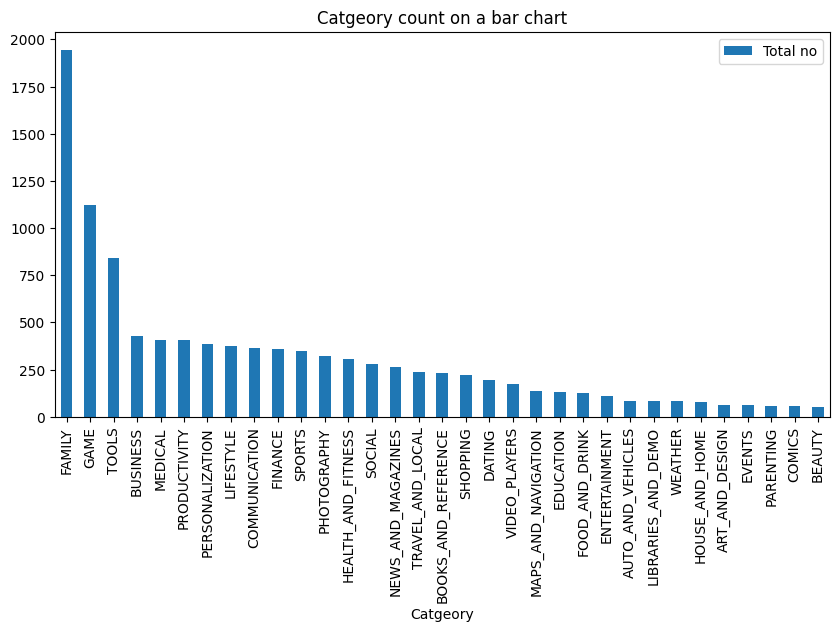

In [ ]:
#Catgeory count on a bar chart(matplotlib)
Q1=x['Category'].value_counts()
plt.figure(figsize=(10,5))
Q1.plot(kind='bar',label='Total no')
plt.title('Catgeory count on a bar chart')
plt.xlabel('Catgeory')
plt.legend()
plt.show()

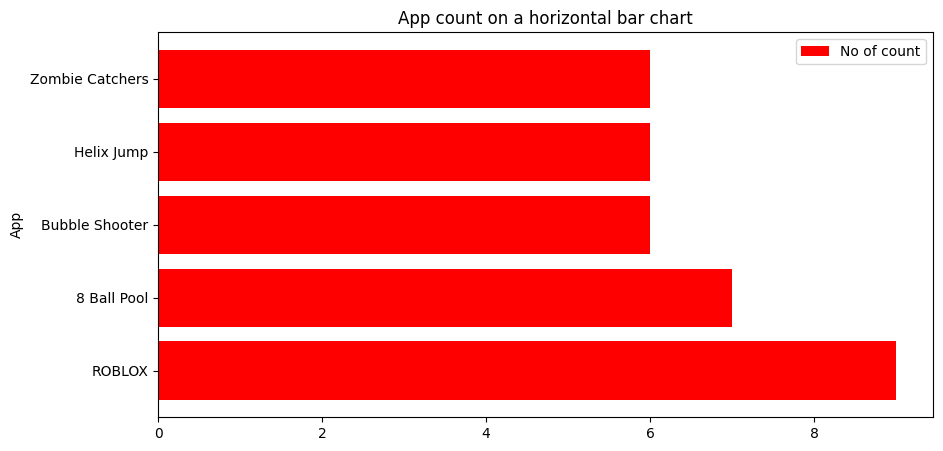

In [ ]:
#App on a horizontal bar chart(matplotlib)
Q2=x['App'].value_counts()
Q2_2=Q2.head(5)
plt.figure(figsize=(10,5))
plt.barh(Q2_2.index,Q2_2.values,label='No of count',color='red')
plt.title('App count on a horizontal bar chart')
plt.ylabel('App')
plt.legend()
plt.show()

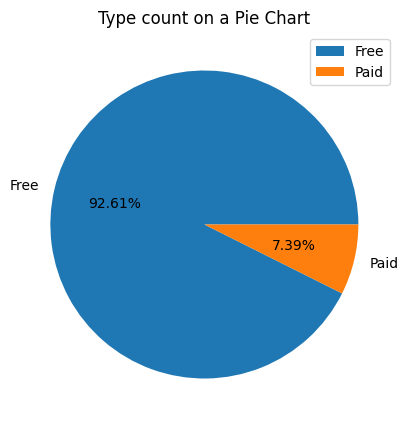

In [ ]:
#Type on a Pie Chart(matplotlib)
Q3=x['Type'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(x=Q3.values,labels=Q3.index,autopct='%.2f%%')
plt.title('Type count on a Pie Chart')
plt.legend()
plt.show()

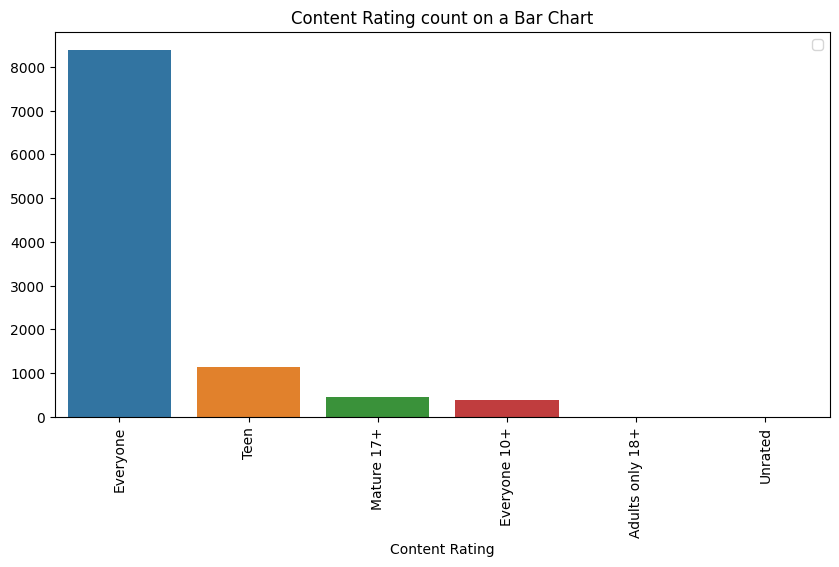

In [ ]:
#Content Rating on a bar chart(seaborn)

Q4=x['Content Rating'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=Q4.index,y=Q4.values)
plt.xlabel('Content Rating')
plt.xticks(rotation=90)
plt.title('Content Rating count on a Bar Chart')
plt.legend()
plt.show()

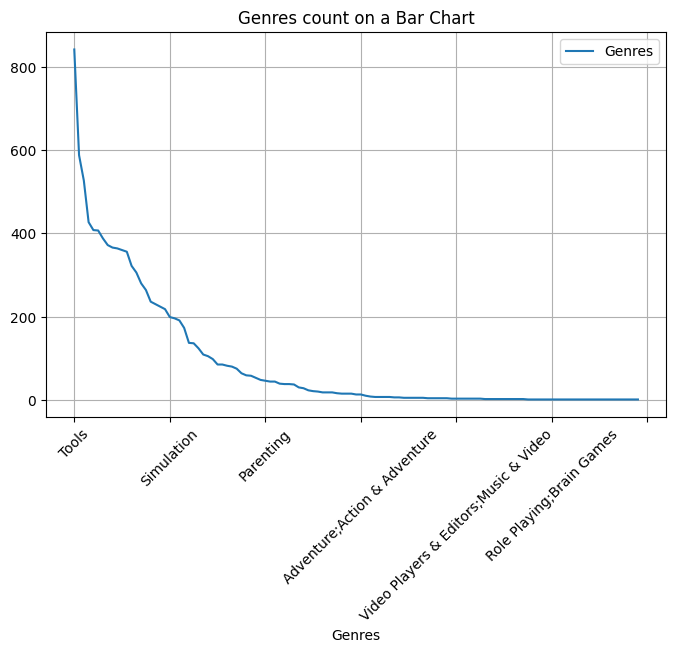

In [ ]:
#Genres on a line chart(matplotlib)
plt.figure(figsize=(8,5))
Q5=x['Genres'].value_counts()
Q5.plot(kind='line')
plt.xlabel('Genres')
plt.xticks(rotation=45)
plt.title('Genres count on a Bar Chart')
plt.legend()
plt.grid()
plt.show()

***Find Category and Genres wise Total Reviews and Price it on a bar chart***

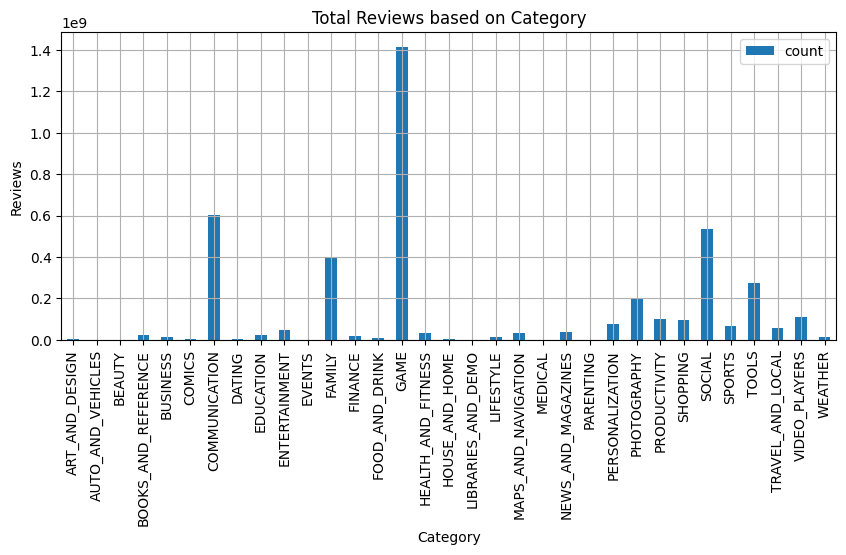

In [ ]:
plt.figure(figsize=(10,4))
s=x.groupby('Category')['Reviews'].sum()
s.plot(kind='bar',label='count')
plt.ylabel('Reviews')
plt.title('Total Reviews based on Category')
plt.legend()
plt.grid()
plt.show()


In [ ]:
s=x.groupby('Category')['Reviews'].sum()
s

Category
ART_AND_DESIGN         1.714440e+06
AUTO_AND_VEHICLES      1.163666e+06
BEAUTY                 3.962400e+05
BOOKS_AND_REFERENCE    2.187323e+07
BUSINESS               1.235817e+07
COMICS                 3.383276e+06
COMMUNICATION          6.012736e+08
DATING                 5.545397e+06
EDUCATION              2.316550e+07
ENTERTAINMENT          4.757072e+07
EVENTS                 1.610180e+05
FAMILY                 3.967720e+08
FINANCE                1.699989e+07
FOOD_AND_DRINK         7.671576e+06
GAME                   1.415537e+09
HEALTH_AND_FITNESS     3.084519e+07
HOUSE_AND_HOME         2.794772e+06
LIBRARIES_AND_DEMO     1.037118e+06
LIFESTYLE              1.282058e+07
MAPS_AND_NAVIGATION    3.065925e+07
MEDICAL                1.396757e+06
NEWS_AND_MAGAZINES     3.824587e+07
PARENTING              9.583310e+05
PERSONALIZATION        7.519316e+07
PHOTOGRAPHY            2.042974e+08
PRODUCTIVITY           1.025545e+08
SHOPPING               9.493116e+07
SOCIAL             

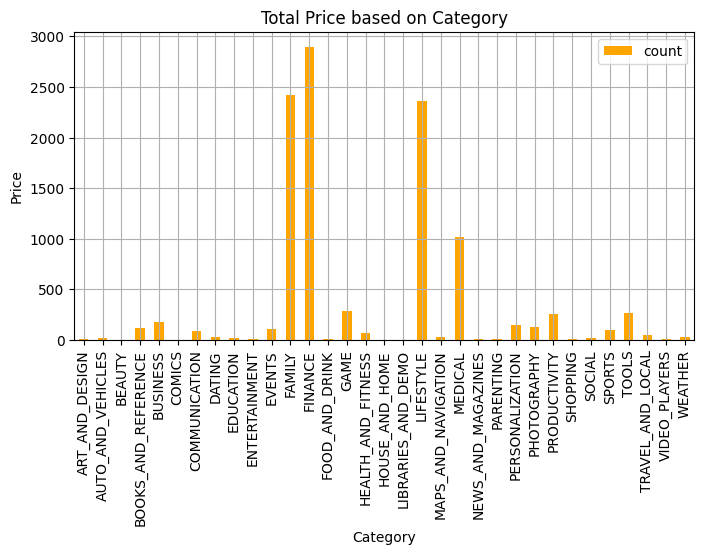

In [ ]:
plt.figure(figsize=(8,4))
s=x.groupby('Category')['Price'].sum()
s.plot(kind='bar',label='count',color='orange')
plt.ylabel('Price')
plt.title('Total Price based on Category')
plt.legend()
plt.grid()
plt.show()


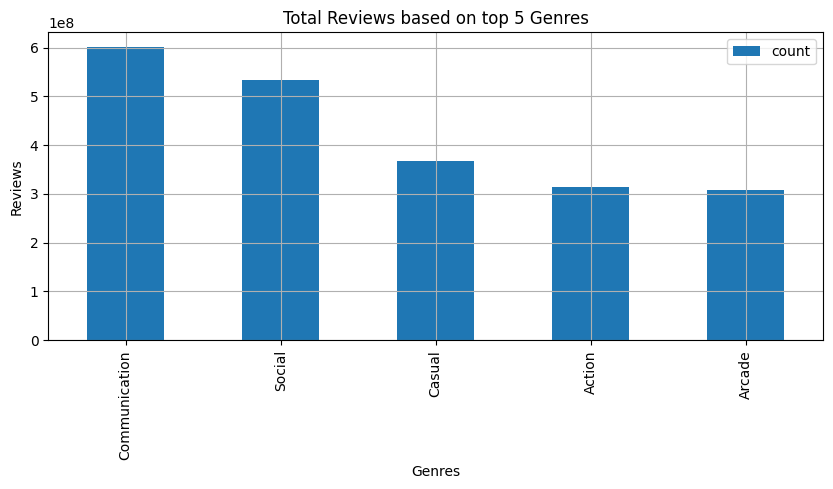

In [ ]:
plt.figure(figsize=(10,4))
s=x.groupby('Genres')['Reviews'].sum()
s1=s.sort_values(ascending=False).head()
s1.plot(kind='bar',label='count')
plt.ylabel('Reviews')
plt.title('Total Reviews based on top 5 Genres')
plt.legend()
plt.grid()
plt.show()

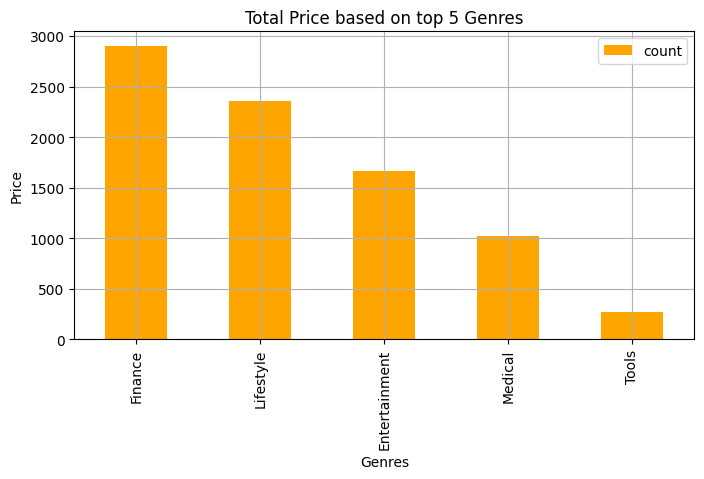

In [ ]:
plt.figure(figsize=(8,4))
s=x.groupby('Genres')['Price'].sum()
s1=s.sort_values(ascending=False).head()
s1.plot(kind='bar',label='count',color='orange')
plt.ylabel('Price')
plt.title('Total Price based on top 5 Genres')
plt.legend()
plt.grid()
plt.show()

***Find total installation based on Category***

Category
ART_AND_DESIGN          124338100
AUTO_AND_VEHICLES        53130211
BEAUTY                   27197050
BOOKS_AND_REFERENCE    1916469576
BUSINESS                863664865
Name: installation, dtype: int64


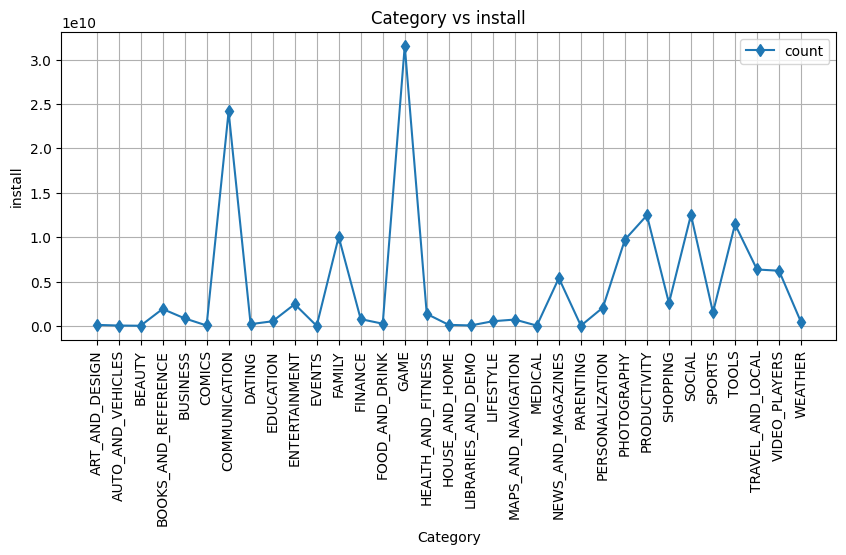

In [ ]:
plt.figure(figsize=(10,4))
s=x.groupby('Category')['installation'].sum()
print(s.head())
plt.plot(s.index,s.values,marker='d',label='count')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('install')
plt.title('Category vs install')
plt.legend()
plt.grid()
plt.show()

***Find Average Rating on each Category and each apps***

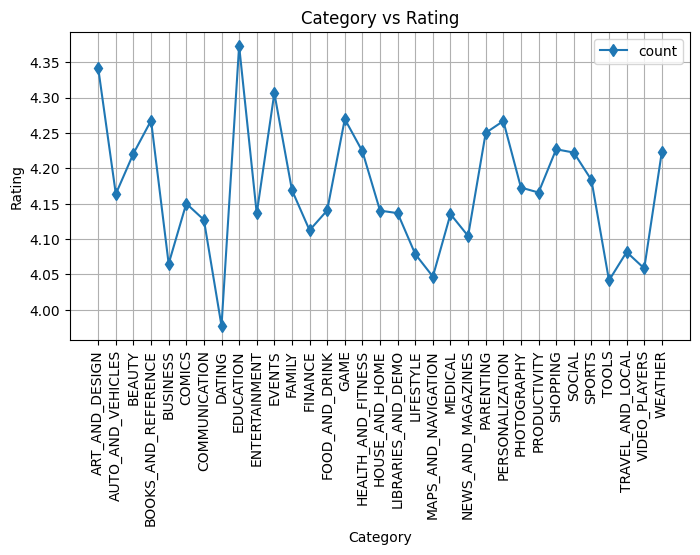

In [ ]:
s=x.groupby('Category')['Rating'].mean()
plt.figure(figsize=(8,4))
plt.plot(s.index,s.values,marker='d',label='count')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Category vs Rating')
plt.legend()
plt.grid()
plt.show()

In [ ]:
s0=x.groupby('App')['Rating'].mean()
s1=s0.sort_values(ascending=False)
s=s1.head()
print(s)

App
Dr Bk Sachin bhai                                 5.0
Clinic Doctor EHr                                 5.0
EP Church Annapolis                               5.0
Pyaar Ek Dhoka                                    5.0
Bacterial vaginosis Treatment - Sexual disease    5.0
Name: Rating, dtype: float64


<Axes: >

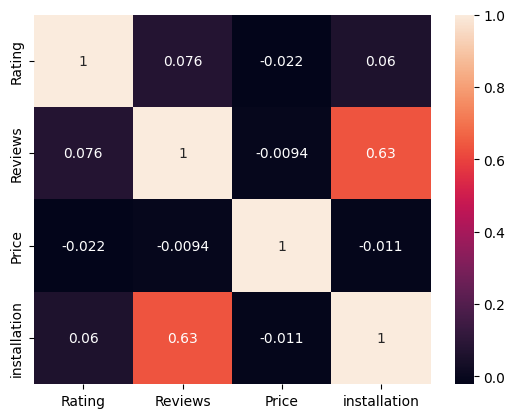

In [ ]:
#correlation data
correlation=x.corr()
correlation
sns.heatmap(correlation,annot=True)


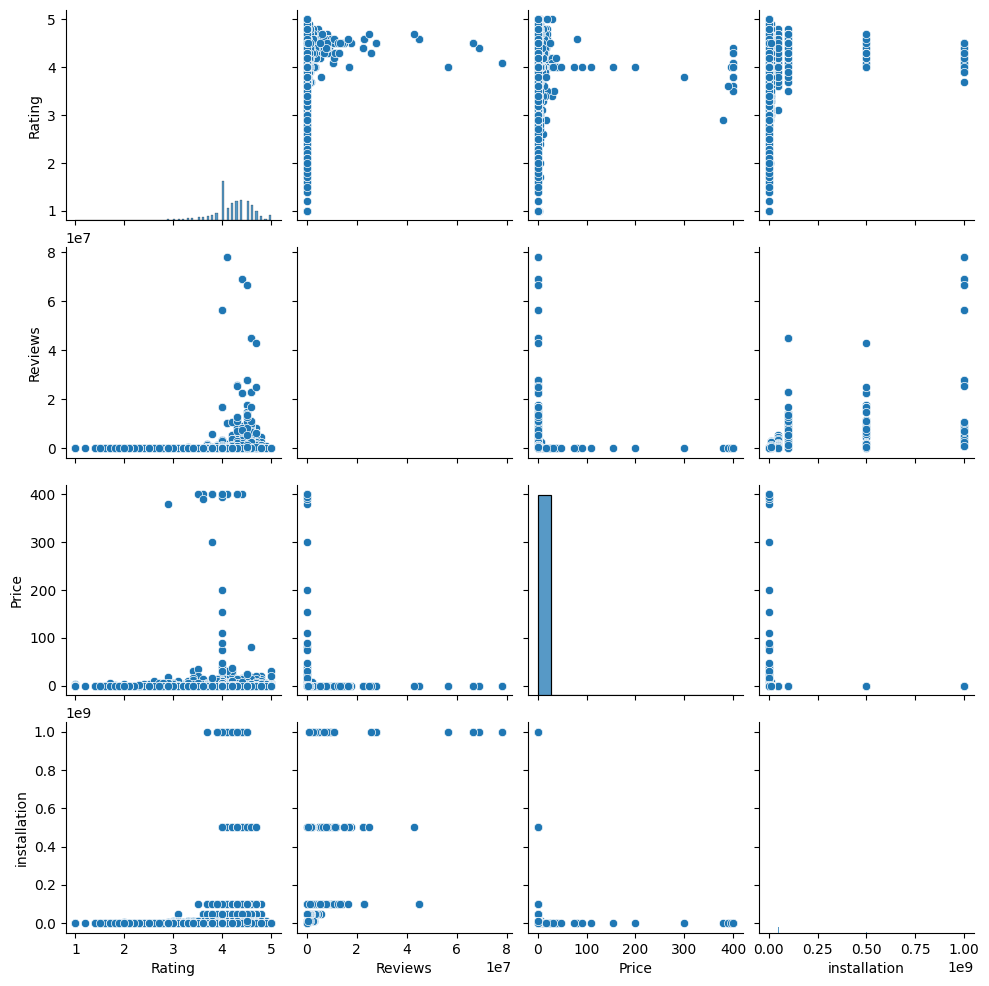

In [ ]:
#pairplot grpahs for the numerical column Type
sns.pairplot(x)


***Dataset for google play store user reviews***

In [ ]:
y=pd.read_csv('/content/googleplaystore_user_reviews.csv')
y.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
y.shape

(64295, 5)

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
y.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
y.duplicated().sum()

33616

In [ ]:
y.drop_duplicates(inplace=True)

In [ ]:
y.shape

(30679, 5)

In [ ]:
y.isnull().sum()

App                         0
Translated_Review         987
Sentiment                 982
Sentiment_Polarity        982
Sentiment_Subjectivity    982
dtype: int64

In [ ]:
y1=y.dropna(axis=0,how='any')

In [ ]:
y1.shape

(29692, 5)

In [ ]:
y1.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
y1.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [ ]:
y1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [ ]:
y1.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,29692.000000,29692.000000
mean,0.188868,0.490930
std,0.355694,0.265976
min,-1.000000,0.000000
25%,0.000000,0.350000
50%,0.157143,0.514286
75%,0.422917,0.652703
max,1.000000,1.000000


In [ ]:
y1['App'].unique()

array(['10 Best Foods for You', '104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室',
       '11st', '1800 Contacts - Lens Store',
       '1LINE – One Line with One Touch',
       '2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif',
       '21-Day Meditation Experience',
       '2Date Dating App, Love and matching',
       '2GIS: directory & navigator', '2RedBeans',
       '2ndLine - Second Phone Number',
       '30 Day Fitness Challenge - Workout at Home',
       '365Scores - Live Scores', '3D Live Neon Weed Launcher',
       '4 in a Row', '4K Wallpapers and Ultra HD Backgrounds',
       '591房屋交易-租屋、中古屋、新建案、實價登錄、別墅透天、公寓套房、捷運、買房賣房行情、房價房貸查詢', '591房屋交易-香港',
       '7 Cups: Anxiety & Stress Chat', '7 Day Food Journal Challenge',
       '7 Minute Workout', '7 Weeks - Habit & Goal Tracker',
       '8 Ball Pool', '850 Sports News Digest',
       '8fit Workouts & Meal Planner', '95Live -SG#1 Live Streaming App',
       'A Call From Santa Claus!', 'A Word A Day',
       'A&E - Watch Full Episodes of TV Shows',
 

In [ ]:
y1['Translated_Review'].unique()

array(['I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"',
       'This help eating healthy exercise regular basis',
       'Works great especially going grocery store', ...,
       'Dumb app, I wanted post property rent give option. Website work. Waste time space phone.',
       'I property business got link SMS happy performance still guys need raise bar guys Cheers',
       'Useless app, I searched flats kondapur, Hyderabad . None number reachable I know flats unavailable would keep posts active'],
      dtype=object)

In [ ]:
y1['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

###Find which of top 5 Apps getting max positive sentiments

ColorNote Notepad Notes         91
Calorie Counter - Macros        87
Family Locator - GPS Tracker    85
8fit Workouts & Meal Planner    82
Calorie Counter - MyNetDiary    82
Name: App, dtype: int64


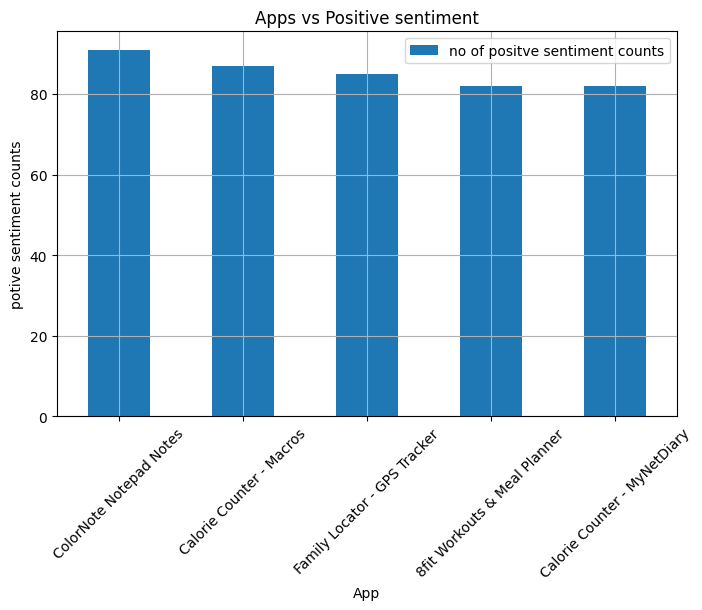

In [ ]:
y2=y1[y1['Sentiment']=='Positive']
y3=y2['App'].value_counts().head()
print(y3)
plt.figure(figsize=(8,5))
y3.plot(kind='bar',label='no of positve sentiment counts')
plt.xticks(rotation=45)
plt.xlabel('App')
plt.ylabel('potive sentiment counts')
plt.title('Apps vs Positive sentiment')
plt.legend()
plt.grid()
plt.show()

###Percentage of data distribution besed on Sentiment using pie chart

Positive    19015
Negative     6321
Neutral      4356
Name: Sentiment, dtype: int64


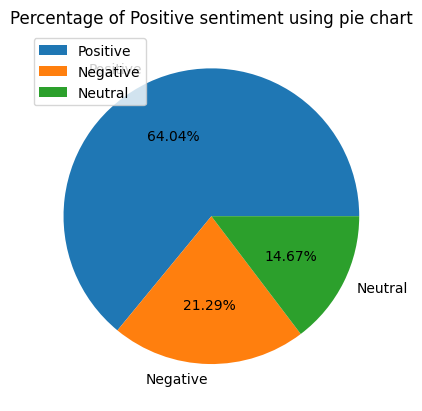

In [ ]:
sentiment_count=y1['Sentiment'].value_counts()
print(sentiment_count)
plt.pie(x=sentiment_count.values,labels=sentiment_count.index,autopct='%.2f%%')
plt.title('Percentage of Positive sentiment using pie chart')
plt.legend()
plt.show()

<Axes: xlabel='Sentiment_Polarity', ylabel='Sentiment'>

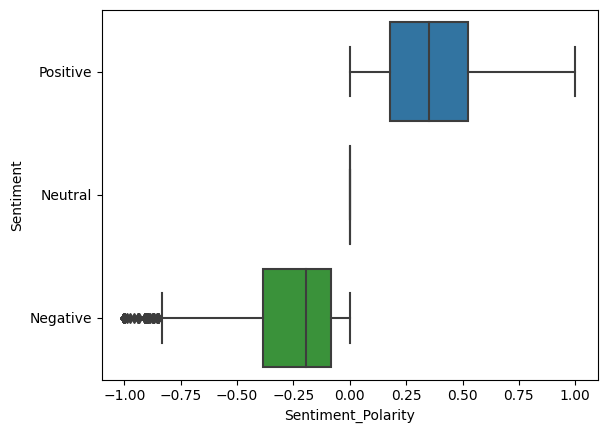

In [ ]:
sentiment_pol=y1.groupby('Sentiment')['Sentiment_Polarity'].mean()
sentiment_pol
sns.boxplot(x="Sentiment_Polarity",y="Sentiment",data=y1)

###Final Conclusion:

1.Top 5 category by the most number of installs are GAME, COMMUNICATION, SOCIAL,PRODUCTIVITY and TOOLS.

2.Top 5 Apps are getting most Rating are-Dr Bk Sachin bhai,Clinic Doctor EHr,EP Church Annapolis,Pyaar Ek Dhoka,Bacterial vaginosis Treatment - Sexual disease    

3.Top 5 Apps getting max positive sentiments-ColorNote Notepad Notes,Calorie Counter - Macros,Family Locator - GPS Tracker,8fit Workouts & Meal Planner,Calorie Counter - MyNetDiary